In [1]:
import numpy as np
import random
import scipy.stats as stats
from scipy.stats import beta
import time
from math import comb
from matplotlib import pyplot as plt

In [2]:
n = int(10e3)

h = lambda x: 1/(x**3 + 2*x + 3)
f = lambda x, a, b: beta.pdf(x, a, b)

lowest_se = -1
best_ab = (-1, -1)
best_area = 0

for a in range(1, 6):
    for b in range(1, 6):
        sample = np.random.beta(a, b, size=n) * np.pi
        area = np.mean([(h(s))/(f(s/np.pi, a, b)) for s in sample]) * np.pi
        standard_error = stats.sem(sample)
        
        if lowest_se == -1 or standard_error < lowest_se:
            print(a, b)
            print("area: " + str(area))
            print("standard error: " + str(standard_error))
            print()
            lowest_se = standard_error
            best_ab = (a, b)
            best_area = area
            

print(lowest_se)
print(best_ab)
print(best_area)

1 1
area: 0.39857585919987687
standard error: 0.009031956586218155

1 2
area: 0.4025670585877877
standard error: 0.007361840477328686

1 3
area: 0.4016607769585918
standard error: 0.006041631429802475

1 4
area: 0.3991595687433921
standard error: 0.005036971008317475

1 5
area: 0.3993425990412429
standard error: 0.00440317770851231

5 1
area: 0.20974024811156727
standard error: 0.004387605084176968

0.004387605084176968
(5, 1)
0.20974024811156727


In [3]:
arr = np.arange(10)
print(arr)
arr[arr > 5] = 0
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 0 0 0 0]


In [8]:
n = 1000
p = 0.3

def cdf(x, p):
    if x < 0:
        return 0
    elif x >= 0 and x < 1:
        return 1 - p
    else:
        return 1
        
g = lambda u, A: min([a for a in A if u <= cdf(a, p)])


In [12]:
import random
sample = [random.random() for _ in range(n)]
A = [0, 1]
draws = [g(s, A) for s in sample]
print(np.mean(draws))

0.312


In [26]:

k = 10
samples = []
start = time.time()
for _ in range(1000):
    sample = [random.random() < p for _ in range(k)]
    samples.append(sum(sample))
end = time.time()
print(end - start)
print(samples)

0.0019998550415039062
[2, 3, 5, 2, 4, 3, 0, 4, 4, 0, 6, 4, 5, 3, 3, 3, 3, 2, 2, 4, 2, 5, 4, 4, 1, 2, 4, 3, 1, 1, 1, 3, 3, 3, 3, 5, 3, 2, 4, 4, 3, 4, 1, 5, 5, 4, 3, 4, 5, 3, 4, 2, 0, 1, 2, 5, 5, 3, 4, 3, 4, 3, 8, 3, 2, 2, 4, 5, 3, 2, 5, 3, 5, 5, 1, 5, 3, 2, 4, 2, 3, 3, 3, 4, 2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 5, 2, 3, 4, 4, 5, 2, 5, 0, 4, 3, 2, 2, 4, 3, 5, 3, 4, 4, 2, 3, 1, 4, 3, 4, 2, 4, 2, 3, 3, 2, 1, 0, 2, 1, 3, 2, 2, 3, 4, 5, 4, 3, 1, 3, 4, 2, 3, 1, 1, 1, 0, 3, 4, 4, 4, 3, 4, 1, 1, 6, 4, 3, 2, 2, 3, 2, 4, 3, 6, 2, 7, 4, 1, 5, 5, 4, 2, 1, 5, 3, 2, 1, 5, 1, 3, 5, 4, 5, 3, 3, 2, 0, 2, 2, 4, 5, 6, 2, 3, 4, 2, 1, 5, 4, 3, 1, 3, 3, 4, 2, 3, 3, 6, 3, 3, 4, 3, 5, 3, 4, 3, 3, 4, 3, 5, 4, 3, 5, 4, 2, 1, 1, 3, 3, 5, 2, 2, 2, 3, 2, 6, 2, 4, 1, 0, 5, 2, 4, 2, 4, 0, 3, 2, 4, 2, 4, 4, 1, 2, 4, 3, 4, 6, 4, 2, 3, 2, 2, 3, 5, 2, 3, 4, 3, 1, 4, 5, 4, 4, 5, 1, 3, 2, 5, 2, 1, 5, 3, 2, 5, 5, 5, 2, 1, 7, 4, 2, 5, 5, 1, 4, 5, 4, 2, 6, 3, 1, 3, 3, 2, 3, 2, 5, 3, 6, 1, 1, 2, 3, 4, 5, 1, 3, 3, 2, 2, 3, 6, 0, 1,

In [43]:
def cdf_binom(x, p, k):
    return sum([comb(k, i)*(p**i)*(1-p)**(k-i) for i in range(x + 1)])

g = lambda u, A: min([a for a in A if u <= cdf_binom(a, p, k)])

In [45]:
start = time.time()
sample = [random.random() for _ in range(n)]
A = list(range(k + 1))

draws = [g(s, A) for s in sample]

end = time.time()
print(end - start)
print(draws)

0.04603314399719238
[4, 1, 2, 3, 2, 2, 4, 0, 2, 1, 1, 1, 4, 2, 3, 1, 3, 1, 4, 1, 4, 2, 3, 3, 2, 1, 4, 2, 2, 4, 1, 2, 4, 4, 4, 2, 5, 3, 1, 4, 4, 3, 3, 4, 5, 4, 5, 3, 4, 4, 1, 2, 3, 2, 3, 4, 7, 4, 3, 2, 3, 5, 6, 3, 4, 1, 4, 3, 2, 3, 2, 5, 2, 4, 4, 2, 4, 3, 3, 4, 3, 2, 3, 5, 3, 4, 2, 2, 3, 4, 3, 5, 4, 3, 7, 2, 3, 3, 1, 3, 1, 1, 3, 2, 2, 4, 2, 0, 3, 4, 1, 5, 3, 2, 5, 5, 3, 3, 1, 2, 3, 0, 4, 1, 6, 4, 2, 4, 2, 4, 3, 5, 4, 0, 2, 2, 3, 3, 1, 5, 6, 3, 2, 4, 3, 2, 4, 2, 3, 2, 3, 1, 4, 4, 5, 4, 3, 1, 6, 3, 3, 3, 3, 1, 4, 2, 3, 3, 2, 3, 4, 2, 3, 2, 2, 5, 2, 5, 2, 3, 2, 1, 5, 7, 4, 1, 1, 3, 4, 5, 3, 5, 5, 3, 4, 2, 1, 6, 0, 4, 4, 1, 5, 2, 3, 2, 3, 2, 4, 6, 4, 3, 5, 3, 2, 4, 3, 3, 4, 2, 3, 2, 3, 4, 4, 2, 2, 3, 2, 2, 4, 3, 3, 3, 2, 4, 5, 1, 3, 1, 3, 5, 5, 6, 4, 3, 6, 2, 4, 3, 4, 4, 4, 1, 2, 5, 3, 5, 1, 3, 1, 5, 4, 3, 2, 5, 3, 5, 4, 2, 1, 5, 3, 4, 5, 4, 4, 4, 4, 3, 4, 2, 2, 3, 3, 2, 4, 3, 4, 4, 4, 4, 3, 4, 3, 0, 1, 1, 1, 1, 3, 3, 5, 3, 3, 3, 1, 5, 2, 1, 3, 4, 2, 4, 3, 2, 3, 5, 3, 3, 2, 4, 6, 1, 5, 2, 3

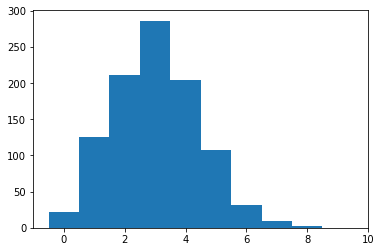

In [64]:
plt.hist(draws, bins= list(range(11)), align="left")
plt.show()

In [51]:
d = {i: len([j for j in samples if j == i]) for i in set(draws)}
print(d)

{0: 31, 1: 103, 2: 221, 3: 255, 4: 204, 5: 134, 6: 39, 7: 9, 8: 4}


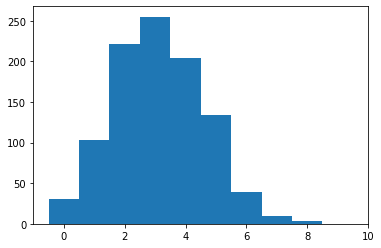

In [65]:
plt.hist(samples, bins= list(range(11)), align="left")
plt.show()

In [66]:
d = {i: len([j for j in samples if j == i]) for i in set(samples)}
print(d)

{0: 31, 1: 103, 2: 221, 3: 255, 4: 204, 5: 134, 6: 39, 7: 9, 8: 4}


5.331032752990723


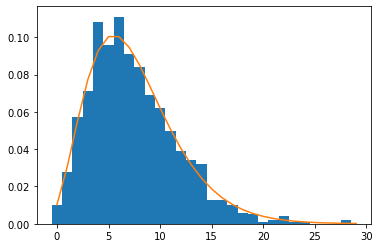

In [59]:
from scipy.stats import nbinom

"""def cdf_neg_binom(s, f, p):
    if s == 0:
        return (1-p)**f
    res = p**s
    res *= sum([comb(s + j - 1, s - 1)*(1 - p)**(j) for j in range(f + 1)])
    #print(res)
    return res"""

g = lambda u, A: min([s for s in A if u <= nbinom.cdf(s, f, p)])

f = 5
p = 0.4

sample = [random.random() for _ in range(1000)]
A = list(range(int(50)))

draws = [g(pt, A) for pt in sample]
bins = max(draws)

pmf = lambda s, f, p: comb(s+f-1, s) * (1-p)**s * p**f
lin = np.linspace(0, bins, bins + 1)

plt.hist(draws, bins= list(range(bins + 1)), align="left", density=True)
plt.plot(lin, [pmf(int(l), f, p) for l in lin])

plt.show()

In [89]:
integral = lambda x: -np.exp(x)*(x**2 - 3*x + 3)
integral_const = 1/(integral(1) - integral(0))
print(integral_const)

3.5496467783038432


[-0.0003354544851063234, -0.00021383962949617086]


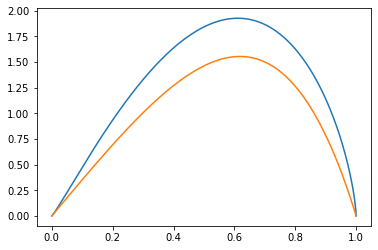

In [121]:
from scipy.stats import beta

M = 1.3
a = 2.1
b = 1.7

beta_pdf = lambda x, a, b: beta.pdf(x, a, b)
lin = np.linspace(0, 1, 1000)
data1 = [M * beta_pdf(l, a, b) for l in lin]
plt.plot(lin, data1)

f = lambda x: x*(1 - x)*np.exp(x) * integral_const
data2 = [f(l) for l in lin]
plt.plot(lin, data2)

print([data1[i] - data2[i] for i in range(100) if data1[i] - data2[i] < 0])

plt.show()



In [135]:
n = 1000
beta_samples = beta.rvs(a, b, size=n)
unifs = [random.random() for _ in range(n)]
draws = [z for i, z in enumerate(beta_samples) if unifs[i] <= (f(z))/(M*beta_pdf(z, a, b))]
print(len(draws))
print(max(draws))
print(max(beta_samples))

772
0.9899656156198079
0.9899656156198079


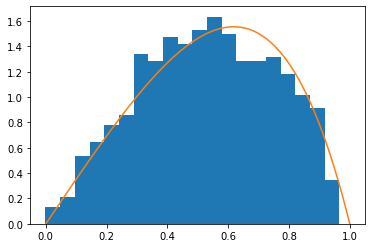

In [139]:
plt.hist(draws, bins=20, align="left", density=True)
plt.plot(lin, [f(l) for l in lin])
plt.show()